In [1]:
import sys
from pandas import *
import numpy as np
import matplotlib
from matplotlib import pyplot
import itertools as it
import matplotlib.backends.backend_pdf
import math
from matplotlib.pyplot import cm
from dateutil import parser
import scipy
from scipy.stats import mstats
import re
import collections
import os
import matplotlib.pyplot as plt
import json

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np

rfmixOutput = np.loadtxt('/Path/to/Rprocessed/FBoutputFile',skiprows=1)
plt.imshow(rfmixOutput, interpolation=‘nearest’, aspect=‘auto’)
plt.colorbar()
# plt.savefig(‘FigureName.pdf’)
#to plot a certain region of the chromosome, I manually find the indexes of SNPs in the region I want to plot, and use the ‘usecols’ argument...
rfmixOutput_localRegion = np.loadtxt(‘/Path/to/Rprocessed/FBoutputFile’,skiprows=1, usecols=range(280594,293641))
plt.imshow(rfmixOutput_localRegion, interpolation=‘nearest’, aspect=‘auto’)

In [51]:
def plot_rfmix_output(rfmix_file,outname,pos_start,pos_end):
    
#     rfmix_out_df = read_csv('/local3/jake/admix_simul/testing/low_memory_version/RFMix/singlemigr.wrecombmap.chr4_5Mbwindow.output.v3.rep1_only.rfmix_output.fb.tsv',)
    rfmix_out_df = read_csv(rfmix_file,delimiter='\t',skiprows=1)
    df_toplot = rfmix_out_df.loc[(rfmix_out_df['physical_position'] >= pos_start) & (rfmix_out_df['physical_position'] <= pos_end)]
    plot_df = df_toplot[list(df_toplot.columns[4:])]
    
    fig,ax = plt.subplots()
    im = ax.imshow(np.array(plot_df), interpolation='nearest', aspect='auto')
    fig.colorbar(im)
    
#     plt.savefig(outname)
    plt.show()

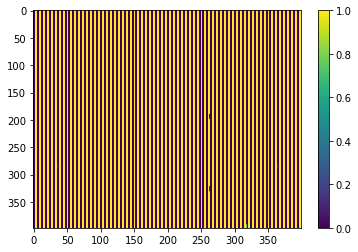

In [53]:
outname = '/local3/jake/admix_simul/testing/low_memory_version/RFMix/singlemigr.wrecombmap.chr4_5Mbwindow.output.v3.rep1_only.rfmix_output.fb.tsv'
plot_rfmix_output(outname,'test.png',297804,40184390)



In [54]:
rfmix_out_df

,chromosome,physical_position,genetic_position,genetic_marker_index,POP2ID0:::hap1:::Ancient_African,POP2ID0:::hap1:::Modern_European,POP2ID0:::hap2:::Ancient_African,POP2ID0:::hap2:::Modern_European,POP2ID1:::hap1:::Ancient_African,POP2ID1:::hap1:::Modern_European,...,POP2ID97:::hap2:::Ancient_African,POP2ID97:::hap2:::Modern_European,POP2ID98:::hap1:::Ancient_African,POP2ID98:::hap1:::Modern_European,POP2ID98:::hap2:::Ancient_African,POP2ID98:::hap2:::Modern_European,POP2ID99:::hap1:::Ancient_African,POP2ID99:::hap1:::Modern_European,POP2ID99:::hap2:::Ancient_African,POP2ID99:::hap2:::Modern_European
0,4,61218,0.06918,0,0.0,1.0,0.0,1.0,0.00003,0.99997,...,0.00000,1.00000,0.00003,0.99997,0.0,1.0,0.0,1.0,0.00003,0.99997
1,4,142301,0.16081,5,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
2,4,202818,0.22919,10,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
3,4,297804,0.33653,15,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
4,4,339650,0.38382,20,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,4,104645620,115.12377,5115,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00001,0.99999,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
1024,4,104762442,115.15647,5120,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00003,0.99997,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
1025,4,104901685,115.40413,5125,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00052,0.99948,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000
1026,4,105053533,115.60212,5130,0.0,1.0,0.0,1.0,0.00000,1.00000,...,0.00491,0.99509,0.00000,1.00000,0.0,1.0,0.0,1.0,0.00000,1.00000


In [22]:
test

['POP2ID0:::hap1:::Ancient_African',
 'POP2ID0:::hap1:::Modern_European',
 'POP2ID0:::hap2:::Ancient_African',
 'POP2ID0:::hap2:::Modern_European',
 'POP2ID1:::hap1:::Ancient_African',
 'POP2ID1:::hap1:::Modern_European',
 'POP2ID1:::hap2:::Ancient_African',
 'POP2ID1:::hap2:::Modern_European',
 'POP2ID2:::hap1:::Ancient_African',
 'POP2ID2:::hap1:::Modern_European',
 'POP2ID2:::hap2:::Ancient_African',
 'POP2ID2:::hap2:::Modern_European',
 'POP2ID3:::hap1:::Ancient_African',
 'POP2ID3:::hap1:::Modern_European',
 'POP2ID3:::hap2:::Ancient_African',
 'POP2ID3:::hap2:::Modern_European',
 'POP2ID4:::hap1:::Ancient_African',
 'POP2ID4:::hap1:::Modern_European',
 'POP2ID4:::hap2:::Ancient_African',
 'POP2ID4:::hap2:::Modern_European',
 'POP2ID5:::hap1:::Ancient_African',
 'POP2ID5:::hap1:::Modern_European',
 'POP2ID5:::hap2:::Ancient_African',
 'POP2ID5:::hap2:::Modern_European',
 'POP2ID6:::hap1:::Ancient_African',
 'POP2ID6:::hap1:::Modern_European',
 'POP2ID6:::hap2:::Ancient_African',
 